In [84]:
import os
import pandas as pd
import jieba
print(jieba.__version__)
YahooNews=pd.read_excel('bigfin_dataset_刪除重複.xlsx')

0.42.1


C:\Users\ChunhungLo\AppData\Local\Temp\ipykernel_23508\111899512.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  YahooNews=pd.read_excel('bigfin_dataset_刪除重複.xlsx')


In [105]:
###############################
###Part I: Identify the Nose###
###############################
import re
punctuation = """！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
punctuation2 = "&#<>{}\[\]\\.%()。，"
re_punctuation = "[{}]|[{}]".format(punctuation, punctuation2) 

RE_SUSPICIOUS = re.compile(re_punctuation)
re_punctuation

"[！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏]|[&#<>{}\\[\\]\\.%()。，]"

In [106]:


# RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text"""
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)
    

In [107]:
YahooNews['Impurity']=YahooNews['Context'].apply(impurity, min_len=10)
YahooNews.columns
YahooNews[['Context', 'Impurity']].sort_values(by='Impurity', ascending=False).head(3)

,Context,Impurity
24,A股上市的國際運動品牌製鞋代工廠—華利集團7日晚間公布，受惠於全球運動鞋消費需求強勁，202...,0.161525
12,美國運動品牌大廠Nike公布財報獲利優於預期，主要是受惠終端需求增加，電商通路策略成功，挹助...,0.134474
19,台鋼集團會長謝裕民今（8日）出席台鋼雄鷹加盟記者會。（記者林菁樺攝）\n\n〔記者林菁樺／台...,0.130081


In [108]:
YahooNews['Context'][24]

'A股上市的國際運動品牌製鞋代工廠—華利集團7日晚間公布，受惠於全球運動鞋消費需求強勁，2021年營收年增25.4％至人民幣（下同）174.7億元，淨利年增47.34％至27.68億元。華利主要代工為Nike、Converse、Puma等全球知名運動品牌。\n\n華利集團8日股價收漲3.06％至73.98元，最新總市值為863.35億元。但是半年來，華利股價累計下跌22.33％。\n\n時代財經報導，華利集團成立於2004年，2021年4月在深交所創業板上市，主要從事運動鞋的開發設計、產銷，生產產品包括運動休閒鞋、戶外靴鞋、運動涼鞋及拖鞋等。\n\n華利集團財報顯示，2021年華利的運動鞋代工業務收入達174.3億元，占總營收的99.78％，毛利率為27.17％，全年總產量達到2.09億雙，而全年銷售量約2.11億雙。多數產品銷往美國，其次是歐洲，營收占比分別為86.98％、11.72％。\n\n分產品類別來看，運動休閒鞋產品仍是華利集團的主要收入來源，這類產品貢獻總營收的81.35％。戶外鞋靴、「運動涼鞋／拖鞋及其他」分別貢獻9.06％、9.37％，其他業務占比0.22％。同時，運動休閒鞋產品的毛利率也最高，達到28.88％，戶外鞋靴、「運動涼鞋／拖鞋及其他」毛利率，分別為18.66％、20.52％。'

In [109]:
#####################################################
###Part II: Removing Nose with Regular Expressions###
#####################################################

#remark: html.unescape
import html
p = '&lt;abc&gt;' #&lt; and &gt; are special simbles in html
#not showing in text example
txt= html.unescape(p)
print (txt)

import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text) #in this example, this part does nothing
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', ' ', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    # remove number
    text = re.sub(r'\d+', ' ', text)
    # remove english
    text = re.sub(r'[a-zA-Z]{2,}', ' ', text)
    # remove 全形符號
    text = re.sub(re_punctuation, ' ', text)
    
    return text.strip()

YahooNews['Clean_text'] = YahooNews['Context'].apply(clean)
YahooNews['Impurity']   = YahooNews['Clean_text'].apply(impurity, min_len=20)

<abc>


In [110]:
YahooNews[['Clean_text', 'Impurity']].sort_values(by='Impurity', ascending=False).head(3)     

,Clean_text,Impurity
0,環保概念運動鞋製造商 - 周三 日 上市開啟蜜月行情 掛牌交易首日飆漲 ...,0.0
41,富士達保險經紀人熱血支持鐵人三項運動 今年連續第二年贊助在 月 日及 日於台東活水湖盛大舉辦...,0.0
30,想要擁有一個健康的人生 除了飲食均衡之外 更重要的是持之以恆的運動習慣 為提倡健康樂活生活意...,0.0


In [111]:
YahooNews['Clean_text'][24]

'A股上市的國際運動品牌製鞋代工廠 華利集團 日晚間公布 受惠於全球運動鞋消費需求強勁  年營收年增    至人民幣 下同    億元 淨利年增    至   億元 華利主要代工為     等全球知名運動品牌  華利集團 日股價收漲    至   元 最新總市值為   億元 但是半年來 華利股價累計下跌      時代財經報導 華利集團成立於 年  年 月在深交所創業板上市 主要從事運動鞋的開發設計 產銷 生產產品包括運動休閒鞋 戶外靴鞋 運動涼鞋及拖鞋等  華利集團財報顯示  年華利的運動鞋代工業務收入達   億元 占總營收的     毛利率為     全年總產量達到   億雙 而全年銷售量約   億雙 多數產品銷往美國 其次是歐洲 營收占比分別為           分產品類別來看 運動休閒鞋產品仍是華利集團的主要收入來源 這類產品貢獻總營收的     戶外鞋靴  運動涼鞋 拖鞋及其他 分別貢獻          其他業務占比     同時 運動休閒鞋產品的毛利率也最高 達到     戶外鞋靴  運動涼鞋 拖鞋及其他 毛利率 分別為'

In [11]:
####################################################
###Part III: Character Normalization with textacy###
####################################################  
#No need for Chinese


#############################################
###Part IV: Character Masking with textacy###
#############################################
from textacy.preprocessing import replace

YahooNews['Clean_text']=YahooNews['Clean_text'].apply(replace.urls)

YahooNews.rename(columns={'Context': 'Raw_text', 'Clean_text': 'Context'}, inplace=True)
YahooNews.drop(columns=['Impurity'], inplace=True)

In [12]:
YahooNews

,Title,Urls,From,Date,Time,Raw_text,Context
0,《台北股市》台股9月行情，分析師仍看好,https://tw.stock.yahoo.com/news/%E5%8F%B0%E5%8...,時報資訊,20190901,11:00,【時報-台北電】時序進入9月，面對陸美貿易紛擾等國際變數影響，分析師仍看好中秋節行情。分析師...,【時報-台北電】時序進入9月，面對陸美貿易紛擾等國際變數影響，分析師仍看好中秋節行情。分析師...
1,〈每日外資外匯觀點〉全球經濟下滑下 川普再怎麼抨擊還是難擋強勢美元,https://tw.stock.yahoo.com/news/%E6%AF%8F%E6%9...,鉅亨網,20190902,13:00,美中新一輪互徵關稅 9 月 1 日已正式生效，市場避險情緒升溫，美元指數繼上周大漲 1.61...,美中新一輪互徵關稅 9 月 1 日已正式生效，市場避險情緒升溫，美元指數繼上周大漲 1.61...
2,分析師：電競產業不再低調 投資人可考慮加碼,https://tw.stock.yahoo.com/news/%E5%88%86%E6%9...,鉅亨網,20190902,10:00,Needham 分析師表示，競爭激烈的電子遊戲世界正在美國走出「隱密模式」，該公司認為投資人...,Needham 分析師表示，競爭激烈的電子遊戲世界正在美國走出「隱密模式」，該公司認為投資人...
3,台股盤前─外資大翻多 分析師：留意這三大轉強電子族群,https://tw.stock.yahoo.com/news/%E5%8F%B0%E8%8...,鉅亨網,20190902,08:10,美中貿易衝突可望藉由本月中的雙方重啟談判而獲轉圜，美股大漲助威帶動，也讓國際股市的緊張氣氛緩...,美中貿易衝突可望藉由本月中的雙方重啟談判而獲轉圜，美股大漲助威帶動，也讓國際股市的緊張氣氛緩...
4,外資觀點：歐系外資調高欣興目標價至46元，重申「優於大盤表現」評等,https://tw.stock.yahoo.com/news/%E5%A4%96%E8%B...,財訊快報,20190902,11:10,【財訊快報／記者劉居全報導】歐系外資在最新出爐的報告中表示，欣興(3037)受惠下半年智慧型...,【財訊快報／記者劉居全報導】歐系外資在最新出爐的報告中表示，欣興(3037)受惠下半年智慧型...
...,...,...,...,...,...,...,...
614,《國際金融》德銀分析師：明年美股仍看漲,https://tw.stock.yahoo.com/news/%E5%9C%8B%E9%9...,時報資訊,20191231,11:57,【時報-台北電】德意志銀行分析師Torsten Slok表示，美國長達10年的經濟擴張周期可...,【時報-台北電】德意志銀行分析師Torsten Slok表示，美國長達10年的經濟擴張周期可...
615,分析師：美元在2020年將走弱 有助推升美股表現,https://tw.stock.yahoo.com/news/%E5%88%86%E6%9...,鉅亨網,20191231,10:18,強勢美元一直是美股跨國企業財報中獲利的痛點，但這種情況在 2020 年可能會改變，美元的走向...,強勢美元一直是美股跨國企業財報中獲利的痛點，但這種情況在 2020 年可能會改變，美元的走向...
616,外資觀點：日系外資首評玉晶光(3406)，給予「買進」評等，目標價上看668元,https://tw.stock.yahoo.com/news/%E5%A4%96%E8%B...,財訊快報,20191231,10:12,【財訊快報／記者劉居全報導】日系外資在最新出爐的報告中表示，首次將玉晶光(3406)納入追蹤...,【財訊快報／記者劉居全報導】日系外資在最新出爐的報告中表示，首次將玉晶光(3406)納入追蹤...
617,法人觀點：日盛投信表示，低利環境下，2020年亞洲高收益債報酬可期,https://tw.stock.yahoo.com/news/%E6%B3%95%E4%B...,財訊快報,20191231,14:19,【財訊快報／記者劉居全報導】儘管圍繞貿易衝突和全球增長面臨不確定性，然亞洲信貸的基本面基本穩...,【財訊快報／記者劉居全報導】儘管圍繞貿易衝突和全球增長面臨不確定性，然亞洲信貸的基本面基本穩...


In [14]:
##########################
###Liguistic Processing###
##########################
#1加入繁體詞典
import jieba

jieba.set_dictionary('./dict.txt.big.txt')
stopwords1 = [line.strip() for line in open('./stopWords.txt', 'r', encoding='utf-8').readlines()]

def remove_stop(text):
    c1=[]
    for w in text:
        if w not in stopwords1:
            c1.append(w)
    c2=[i for i in c1 if i.strip() != '']
    return c2

In [ ]:
YahooNews['tokens']=YahooNews['Context'].apply(jieba.cut)

In [ ]:
YahooNews['tokens_new']=YahooNews['tokens'].apply(remove_stop)

In [21]:
YahooNews.iloc[0,:]

Title                                       《台北股市》台股9月行情，分析師仍看好
Urls          https://tw.stock.yahoo.com/news/%E5%8F%B0%E5%8...
From                                                      時報資訊 
Date                                                   20190901
Time                                                      11:00
Raw_text      【時報-台北電】時序進入9月，面對陸美貿易紛擾等國際變數影響，分析師仍看好中秋節行情。分析師...
Context       【時報-台北電】時序進入9月，面對陸美貿易紛擾等國際變數影響，分析師仍看好中秋節行情。分析師...
tokens             <generator object cut at 0x000001BEF3B3F900>
tokens_new    [【, 時報, -, 台, 北電, 】, 時序, 進入, 月, 面對, 陸美, 貿易, 紛擾...
Name: 0, dtype: object

In [16]:
#Freq charts
from collections import Counter
counter = Counter()#use a empty string first
YahooNews['tokens_new'].apply(counter.update)
print(counter.most_common(15))

[('表示', 1019), ('年', 1017), ('市場', 1016), ('美元', 985), ('月', 870), ('中', 763), ('美國', 737), ('經濟', 705), ('中國', 697), ('指出', 669), ('會', 662), ('可能', 615), ('預期', 604), ('分析師', 572), ('全球', 546)]


In [17]:
import seaborn as sns
sns.set(font="SimSun")
min_freq=2
#transform dict into dataframe
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= @min_freq')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(15)

,freq
token,
表示,1019
年,1017
市場,1016
美元,985
月,870
中,763
美國,737
經濟,705
中國,697


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

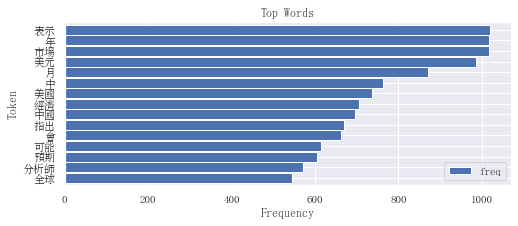

In [18]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [19]:
###Creating Word Clouds
from matplotlib import pyplot as plt
from wordcloud import WordCloud ###
from collections import Counter ###

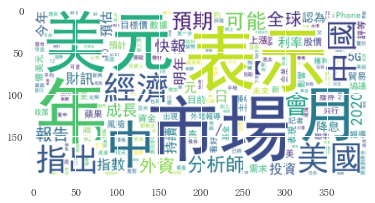

In [20]:
wordcloud = WordCloud(font_path="SimHei.ttf", background_color="white")
wordcloud.generate_from_frequencies(freq_df['freq'])
#plt.figure(figsize=(20,10)) 
plt.imshow(wordcloud)

In [22]:
def list_to_string(org_list, seperator=' '):
    return seperator.join(org_list)

In [23]:
YahooNews['News_seg']=YahooNews['tokens_new'].apply(list_to_string)
YahooNews['News_seg'][1]

'美 中 新一輪 互徵 關稅 月 日 正式 生效 市場 避險 情緒 升溫 美元 指數 繼 上周 大漲 1.61% 周一 亞洲 盤 交易 時段 維持 98.8 附近 高檔 震盪 本周 投資人 關注 美 國聯 準 會 主席 鮑威爾 談話 美國 非農 就業 數據 公布 尋求 聯準 會 貨幣政策 前瞻 指引 線索 美元 指數 日 K 線圖 來源 新浪 財經 本周 市場 避險 基調 不變 投資人 持續 關注 美 中 貿易談判 英國 脫歐 義大利 政治 情勢 地緣 政治 風險 方面 則須 關注 美伊 關係 日韓 貿易戰 後續 發展 原子 資產 管理 香港 公司 指出 美元 指數 目前 短 中長期 均線 呈現 多頭 排列 有利 美元 上漲 預期 本周 美元 指數 仍將 維持 漲勢 有效 突破 99 檔 壓力 進一步 挑戰 100 大關 本周 美國 公布 數據 非農 就業 ISM 製造業 聯準 會 褐 皮書 耐用品 數據 道 明 證券 TD Securities 全球 策略 主管 Bart Melek 表示 最受 投資人 關注 周五 公布 美國 非農 就業 數據 周二 公布 ISM 製造業 數據 預期 維持 50 但須 注意 是否 更加 逼近 景氣 榮枯線 50 關卡 道 明 證券 全球 外匯 策略 主管 Mark McCormick 表示 全球 經濟 陷入困境 時 資金 撤回 美國 一種 自然 本能 資金 流動 美國 投資人 減少 美國 以外 風險 部位 自然 就會將 資金 匯回 川普 政府 抨擊 強勢 美元 全球 經濟 下滑 美元 會 繼續 上漲 BMO Capital Markets 美國 利率 策略 主管 Ian Lyngen 表示 投資人 應 關注 聯準 會 是否 重演 1990 年代 一年 降息 75 基點 貿易戰 影響 是否 會 全球 經濟 造成 更大 傷害 導致 更 寬鬆 舉措 凱投 宏觀 美國 經濟學家 Andrew Hunter 預期 聯準 會 主席 鮑威爾 周五 談話 可能 會 給出 九月 再次 降息 暗示 凱投 宏觀 目前 預期 聯準 會 月 12 月將 降息 預估 明年 利率 維持 不變'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(decode_error='ignore', min_df=2) 

In [25]:
dt01 = cv.fit_transform(YahooNews['News_seg'])
print(cv.get_feature_names())

['00', '000', '00737', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0950', '0989', '10', '100', '1000', '101', '103', '104', '105', '106', '107', '108', '109', '11', '110', '115', '117', '1180', '119', '12', '120', '1200', '12000', '1216', '125', '127', '128', '13', '130', '1301', '135', '14', '140', '143', '147', '1475', '1476', '15', '150', '1500', '1504', '151', '155', '1590', '16', '160', '1600', '164', '165', '168', '17', '170', '172', '173', '175', '18', '180', '182', '185', '19', '190', '1921', '196', '1969', '1990', '1995', '20', '200', '2000', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2030', '2049', '21', '210', '217', '219', '22', '220', '221', '224', '225', '23', '230', '2303', '2308', '2313', '2317', '2324', '2327', '2330', '234', '236', '2360', '2382', '24', '240', '2400', '2449', '245', '2454', '2474', '25', '250', '26', '260', '261', '262', '264', '265

C:\ComputerScience\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
fn=cv.get_feature_names()

In [ ]:
dtmatrix=pd.DataFrame(dt01.toarray(), columns=cv.get_feature_names())

In [30]:
dtmatrix

,00,000,00737,01,02,03,04,05,06,07,...,點將,點後,點或,點的,點陣圖,鼓勵,齊揚,龍頭,龍頭股,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
cosine_similarity(dt01[169], dt01[24])

array([[0.57420789]])

In [ ]:
sm = pd.DataFrame(cosine_similarity(dt01, dt01))

In [34]:
sm

,0,1,2,3,4,5,6,7,8,9,...,609,610,611,612,613,614,615,616,617,618
0,1.000000,0.088394,0.122632,0.258841,0.147631,0.155073,0.027735,0.035097,0.058012,0.046476,...,0.131072,0.099228,0.132247,0.147939,0.167639,0.082184,0.109640,0.162329,0.058336,0.034296
1,0.088394,1.000000,0.206475,0.099492,0.045619,0.069882,0.048565,0.026338,0.059860,0.139511,...,0.176168,0.097736,0.257111,0.175782,0.288206,0.161896,0.431966,0.030168,0.215722,0.058552
2,0.122632,0.206475,1.000000,0.054194,0.039048,0.096949,0.105815,0.040990,0.071141,0.160127,...,0.103808,0.065913,0.086918,0.135345,0.107150,0.167973,0.227000,0.060096,0.020081,0.047665
3,0.258841,0.099492,0.054194,1.000000,0.096218,0.119785,0.022763,0.045264,0.044211,0.035419,...,0.181529,0.137426,0.082999,0.234159,0.185113,0.039346,0.168281,0.098035,0.035278,0.047850
4,0.147631,0.045619,0.039048,0.096218,1.000000,0.274618,0.026093,0.039622,0.065492,0.052469,...,0.080922,0.063013,0.055621,0.083507,0.051615,0.030927,0.041795,0.217838,0.072790,0.065820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,0.082184,0.161896,0.167973,0.039346,0.030927,0.037900,0.016462,0.017856,0.029514,0.206894,...,0.120343,0.154604,0.124669,0.137986,0.075984,1.000000,0.195232,0.010908,0.092942,0.048855
615,0.109640,0.431966,0.227000,0.168281,0.041795,0.075421,0.073587,0.048261,0.079771,0.202786,...,0.170594,0.204341,0.367678,0.243852,0.488601,0.195232,1.000000,0.057829,0.071611,0.092686
616,0.162329,0.030168,0.060096,0.098035,0.217838,0.254244,0.040492,0.075861,0.079195,0.063446,...,0.089699,0.069141,0.084663,0.067319,0.084952,0.010908,0.057829,1.000000,0.075795,0.360502
617,0.058336,0.215722,0.020081,0.035278,0.072790,0.111656,0.095942,0.112068,0.115775,0.137804,...,0.277929,0.099015,0.175951,0.089979,0.116791,0.092942,0.071611,0.075795,1.000000,0.052018


In [35]:
YahooNews['Context'][1]

'美中新一輪互徵關稅 9 月 1 日已正式生效，市場避險情緒升溫，美元指數繼上周大漲 1.61% 後，周一亞洲盤交易時段維持在 98.8 附近高檔震盪；本周投資人關注美國聯準會主席鮑威爾談話及美國非農就業數據公布，尋求聯準會貨幣政策前瞻指引的線索。 美元指數日 K 線圖。(來源：新浪財經) 本周市場避險的基調不變，投資人持續關注美中貿易談判、英國脫歐、義大利政治情勢等，地緣政治風險方面，則須關注美伊關係及日韓貿易戰後續發展。 原子資產管理 (香港) 公司指出，美元指數目前短中長期均線呈現多頭排列，有利美元上漲，預期本周美元指數仍將維持漲勢，一旦有效突破 99 上檔壓力，將進一步挑戰 100 大關。 本周美國公布的數據有非農就業、ISM 製造業、聯準會褐皮書和耐用品數據等，道明證券 (TD Securities) 全球策略主管 Bart Melek 表示，其中最受投資人關注的是周五公布的美國非農就業數據；此外周二公布的 ISM 製造業數據雖預期維持在 50 以上，但須注意的是是否更加逼近景氣榮枯線 50 關卡。 道明證券全球外匯策略主管 Mark McCormick 表示，當全球經濟陷入困境時，資金撤回美國是一種自然的本能，因為資金是流動的，美國投資人為了減少在美國以外的風險部位，自然就會將資金匯回。所以不管川普政府是如何抨擊強勢美元，只要全球經濟下滑，美元就會繼續上漲。 BMO Capital Markets 美國利率策略主管 Ian Lyngen 表示，投資人應關注聯準會是否重演 1990 年代一年降息 75 個基點；或者在貿易戰的影響下，是否會對全球經濟造成更大的傷害，而導致更寬鬆的舉措。 凱投宏觀美國經濟學家 Andrew Hunter 預期，聯準會主席鮑威爾周五的談話可能會給出九月再次降息的暗示。凱投宏觀目前預期聯準會 9 月和 12 月將降息，同時預估明年利率將維持不變。'

In [36]:
YahooNews['Context'][94]

'周三市場將迎來美國聯準會利率決議，亞洲盤交易時段，美元指數持穩在 98.25 附近，相較之前，投資人對聯準會降息預期已開始降溫，分析師甚至提醒，須防範聯準會意外維持利率不變的風險，果真如此，美元將大幅上漲。 美元指數日 K 線圖。(來源：新浪財經) 布朗兄弟哈里曼 (BBH) 策略師表示，如果聯準會果真降息 25 個基點，那麼這將是最後一次，直到真正出現衰退跡象，聯準會才會再次啟動降息。 巴克萊 (Barclays) 也預期聯準會將再度降息 25 個基點，但前瞻指引將不會有太大變化；該行經濟學家並預期本周聯準會政策聲明、經濟預期以及主席鮑威爾會後記者會措辭都會明顯偏鴿。 BK 資產管理董事總經理 Kathy Lien 則認為，市場正在錯誤判斷聯準會鴿派的程度，儘管可能調降利率，但 FOMC 會後聲明將不會那麼鴿派。 道明證券 (TD Securities) 大宗商品策略師 Ryan McKay 表示，美國近期經濟數據和貿易緊張局勢的緩解，給予聯準會在貨幣政策上採取更為中性立場的空間，事實上，目前投資人需要防範的重大風險就是聯準會意外按兵不動，果真如此的話，美元將大幅攀升。 芝加哥商品交易所 (CME) 的 FedWatch 工具顯示，市場對聯準會降息的預期為 65.8%，較前一周的 90% 大減。Forex 外匯網站提醒，如果聯準會此次維持利率不變，並冒著激怒美國總統川普的風險，美元可能會走高。'

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()


tfidf_dt = tfidf.fit_transform(dt01)
tfidfmatrix = pd.DataFrame(tfidf_dt.toarray(), columns=cv.get_feature_names())
cosine_similarity(tfidf_dt[172], tfidf_dt[277])


sm1 =pd.DataFrame(cosine_similarity(tfidf_dt, tfidf_dt))


sm2 = pd.DataFrame(cosine_similarity(tfidf_dt.transpose(), tfidf_dt.transpose()))


C:\ComputerScience\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
YahooNews['Context'][172]
YahooNews['Context'][277]

'【財訊快報／記者劉居全報導】近來中國醫療改革政策著重在醫療保險費用控管加強，進而帶動創新生技製藥研發，並且放寬醫療產業IPO條件，加速醫療產業營收成長，增添醫療投資吸引力。保德信投信認為，全球醫療產業維持穩定成長，新興市場雖市佔率不高，卻是全球最具潛力的市場，隨著人口成熟化，新興國家對於醫療需求與日俱增，也將是成長速度最快市場。 保德信全球醫療生化基金經理人江宜虔表示，隨著中國醫療保險費用控管加強，依賴發展仿製藥廠將難獲得大的成長空間，因此中國醫藥產業發展從營銷導向轉為創新研發。以長期而言，中國醫保控管及鼓勵創新等政策，將有利具創新能力的生技製藥公司發展。 根據統計，2018年全球醫藥市場規模約1.3兆美金，創新藥的市場規模約為7,200億美金，佔整體醫療市場逾五成，其中美國和日本創新藥市場比重約八成，中國比重雖低於二成，但隨著愈來愈多創新藥納入醫保談判名單，2017-2018年僅53項創新藥通過全國醫保，2019年擬有128項列入，中國創新藥市場具有高度成長空間。 醫療產業在新興市場需求暢旺下，將為醫療類股帶來強勁支撐。江宜虔指出，醫療產業不僅具有強勁研發創新能力外，新興市場創新技術比重逐年增加，未來醫療類股成長可期。江宜虔認為，新興創新生技製藥對於醫療產業正向影響將會超越政策不確定性。目前為全球醫療學會高峰期，根據過去經驗醫療類股於醫療學會期間整體表現優於大盤，近期實為佈局醫療類型基金好時點，建議投資人可佈局醫療類股基金。'

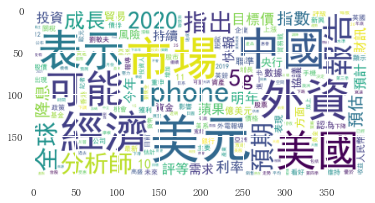

In [40]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud ###
from collections import Counter ###

tfidfsum=tfidfmatrix.T.sum(axis=1)

wordcloud = WordCloud(font_path="SimHei.ttf", background_color="white")
wordcloud.generate_from_frequencies(tfidfsum)
#plt.figure(figsize=(20,10)) 
plt.imshow(wordcloud)

In [42]:
from sklearn.cluster import KMeans

from sklearn import preprocessing 
distortions = []
for i in range(1, 31):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(preprocessing.normalize(tfidf_dt))
    distortions.append(km.inertia_)

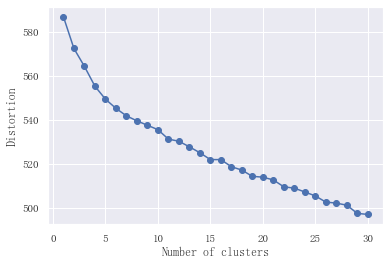

In [43]:
# plot
from matplotlib import pyplot as plt
plt.plot(range(1, 31), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [44]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(preprocessing.normalize(tfidf_dt))

g0 = YahooNews['Context'][y_km==0]
g0.head()
g1 = YahooNews['Context'][y_km==1]
g1.head()
g2 = YahooNews['Context'][y_km==2]
g2.head()
g3 = YahooNews['Context'][y_km==3]
g3.head()
g4 = YahooNews['Context'][y_km==4]
g4.head()

4     【財訊快報／記者劉居全報導】歐系外資在最新出爐的報告中表示，欣興(3037)受惠下半年智慧型...
5     【財訊快報／記者劉居全報導】美系外資在今(2)日最新出爐的報告中表示，看好聯詠(3034)在...
13    【財訊快報／記者戴海茜報導】儘管氣動產業8月份整體需求仍較去年同期衰退，但亞德客-KY(15...
18    【財訊快報／記者劉居全報導】看好台積電(2330)受惠中國提高半導體自製率需求，美系外資在最...
19    【財訊快報／記者劉居全報導】外資聚焦台灣半導體族群，除瑞信證券看好半導體和零組件將成為5G受...
Name: Context, dtype: object